### Изучение закономерностей, определяющих успешность игр

    Мы работаем с интернет-магазином, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Стоит **задача** нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

    Мне предоставлены данные до 2016 года. Нужно обработать данные так, чтобы можно было сделать прогноз на 2017 год.

**Описание проекта**

    Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок.
    

**Описание данных**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


**План работы**

    Шаг 1. Откроем файл с данными и изучим общую информацию
    Путь к файлу: /datasets/games.csv.

    Шаг 2. Подготовим данные
        Заменим названия столбцов (приведем к нижнему регистру);
        Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
        Обработаем пропуски при необходимости:
        Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишем причины, которые могли привести к пропускам;
        Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
        Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

    Шаг 3. Проведем исследовательский анализ данных
        Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
        Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
        Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
        Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
        Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
        Соотнесем выводы с продажами игр на других платформах.
        Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

    Шаг 4. Составим портрет пользователя каждого региона
        Определим для пользователя каждого региона (NA, EU, JP):
        Самые популярные платформы (топ-5). Опишем различия в долях продаж.
        Самые популярные жанры (топ-5). Поясним разницу.
        Влияет ли рейтинг ESRB на продажи в отдельном регионе?

    Шаг 5. Проверим гипотезы
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
        Пороговое значение alpha зададим самостоятельно.
        Поясним:
            Как мы сформулировали нулевую и альтернативную гипотезы;
            Какой критерий применили для проверки гипотез и почему.

    Шаг 6. Напишем общий вывод
        Оформление: Выполним задание в Jupyter Notebook. Заполним программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применим форматирование и заголовки.



**Шаг 1.**

    Откроем файл с данными и изучим общую информацию
    Путь к файлу: /datasets/games.csv.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


**Вывод по изучению общей информации:**

    Необходимо привести к правильному типу столбец : Year of Release
    Также нужно привести к нижнему регистру названия столбцов нашей таблицы
    Имеются пустые значения в столбцах rating, user_score, critic_score. 
    Дубликатов не имеется


**Шаг 2. Подготовка данных**

**2.1. Замена названия столбцов**


        Заменим названия столбцов (приведем к нижнему регистру);
        Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
        Обработаем пропуски при необходимости:
        Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишем причины, которые могли привести к пропускам;
        Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
        Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [8]:
#data = data.rename(columns={'Name': 'name', 'Platform':'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales': 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})  
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


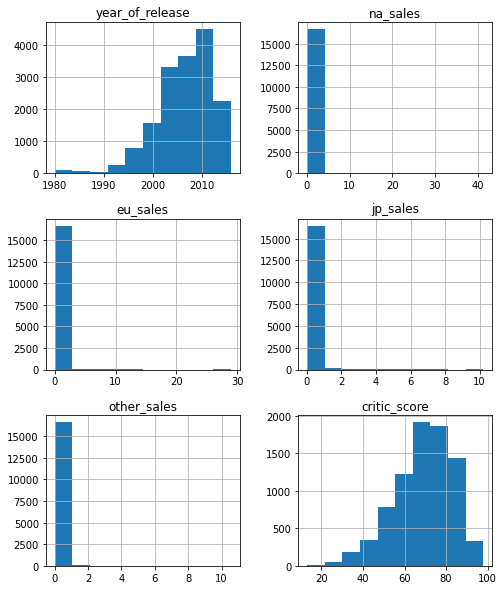

In [9]:
data.hist(figsize=(8, 10))

plt.show()

**2.2. Преобразование типов данных**

In [10]:
data['year_of_release'].describe()
data['year_of_release'].astype('Int64')
 #Удобнее использовать занчение года, как целое число

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

In [11]:
data['critic_score'].describe()
data['critic_score'].unique()
data['critic_score'].astype('Int64') 

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16710    <NA>
16711    <NA>
16712    <NA>
16713    <NA>
16714    <NA>
Name: critic_score, Length: 16715, dtype: Int64

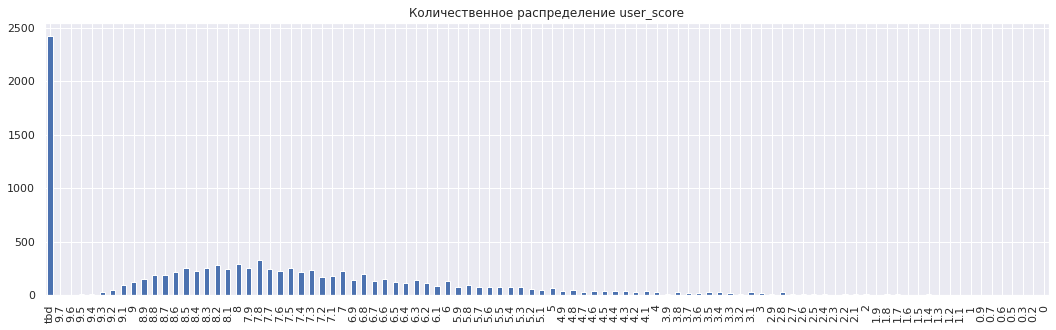

In [12]:
data['user_score'].describe() 
sns.set()
(data['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
)
plt.show()

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data[data['user_score'] == 'tbd']
data[data['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].describe() 

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

**2.3. Обработка пропусков**

In [16]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [17]:
data['name'].value_counts()
data = data.dropna(subset=['name']).reset_index(drop=True) 

#удалим две строки без имени
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [18]:
data['year_of_release'].value_counts()
data['year_of_release'].unique()
data['year_of_release'].describe()
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) 
data.info()
#удаляем строки, где нет данных по году

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


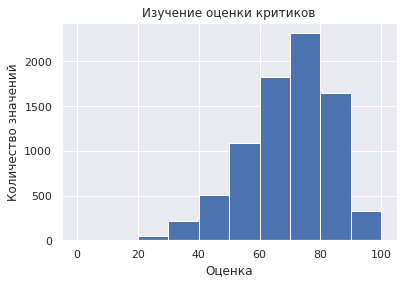

In [19]:
data['critic_score'].hist(bins=10, range=(0, 100))
plt.title('Изучение оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество значений')
plt.show()

In [20]:
#data['critic_score'].value_counts()
data['critic_score'].unique()
data['critic_score'].describe()


count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

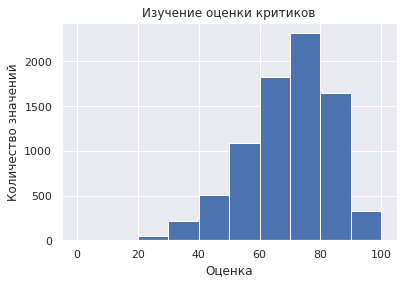

In [21]:
data['critic_score'].hist(bins=10, range=(0, 100))
plt.title('Изучение оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество значений')
plt.show()

In [22]:
data['user_score'].value_counts()
data['user_score'].unique()
data['user_score'].describe()


count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

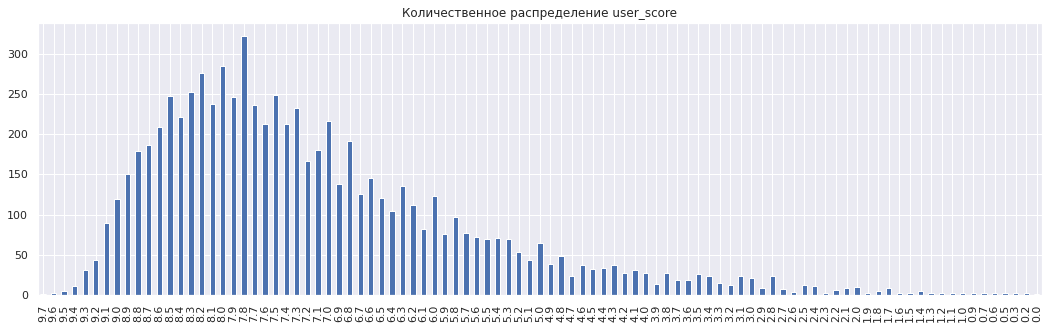

In [23]:
sns.set()
(data['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
)
plt.show()

In [24]:
#data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
#избавились от nan и tdb


In [25]:
data['user_score'] = data['user_score'].astype(float)
#df['user_score'].dtype
data['user_score'].dtype

dtype('float64')

In [26]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [27]:
data['rating'].value_counts()
data['rating'].unique()
data['rating'].fillna('miss', inplace=True)
data['rating'].unique()


array(['E', 'miss', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Вывод**

Данные из столбцов name и year_of_release были удалены, так как неопределенных значений было менее 5%. Для работы в дальнейшем будут необходимы данные о годах и имени. 

Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. В столбце user_score значения tbd были заменены на Nan. В остальных столбцах данные остаются в прежнем виде.

Возможные причины пропусков: 1) не указаны какие-нибудь сведения из-за не хватки информации 2) в самой системе какие-либо не поладки, дала сбой 3) в некоторых средах есть автозаоплнение, оно не сработало

Аббревиатура 'tdb', скорее всего, являются 0, то есть пропуском значения. Возможно, в дальнейшем исследовании его надо будет удалить. Всё зависит от постановки задачи далее.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,miss,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,miss,31.38


**Шаг 3. Проведение исследовательского анализа данных**

**3.1. Сколько игр выпускалось в разные годы.**

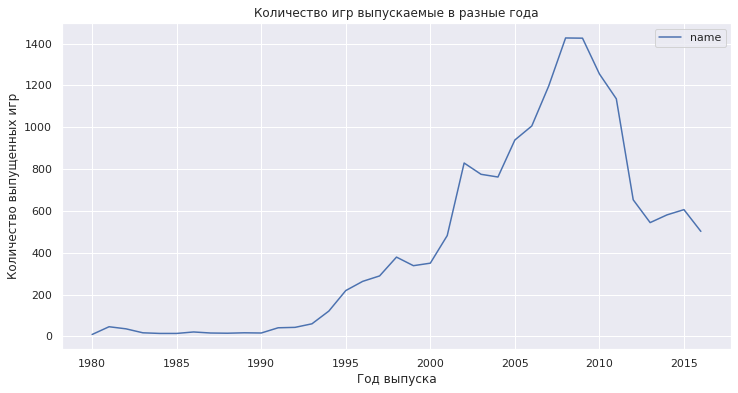

In [29]:
data_games_period = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_games_period
plt.figure(figsize=(12,6))
sns.lineplot(data=data_games_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()
#Начиная с 2000 годов стало выпускаться больше игр, данные до 2006 года, в зависимости от задачи, можно опустить. 

**3.2. Как менялись продажи по платформам**

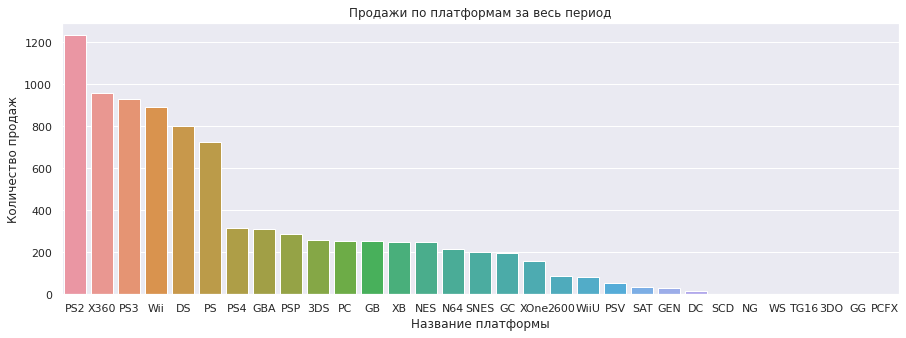

In [30]:
data_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
data_platforms
plt.figure(figsize=(15,5))
sns.barplot(x=data_platforms.index,y=data_platforms['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()
#Первые 6 платформ имеют наибольшие суммарные продажи

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.

In [31]:

data_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)


data_platforms = data_platforms.reset_index().rename_axis(None, axis=1)
data_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


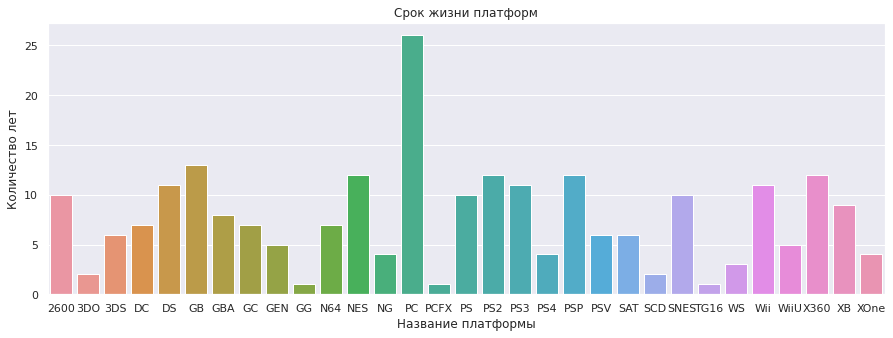

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

In [32]:
year_of_life = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count'))

plt.figure(figsize=(15,5))
sns.barplot(x=year_of_life.index, y='year_of_release', data = year_of_life) #, ax=axis[0,0])
plt.title("Срок жизни платформ")
plt.xlabel("Название платформы")
plt.ylabel("Количество лет")
plt.show()


year_of_life.year_of_release.describe() #Период полураспада платформы 7 лет.

**Вывод** Посмотрели, как менялись продажи по платформам. Выберали платформы с наибольшими суммарными продажами и построили распределение по годам. Характерный срок появлявления новых и исчезновение старых платформ -7 лет.

**3.3. Исследование актуального периода**

**Задача** Взяли данные за соответствующий актуальный период - 2 года. 
Не будем учитывать в работе данные за предыдущие годы.

                 total_sales
year_of_release             
2016.0                129.94
2015.0                267.98


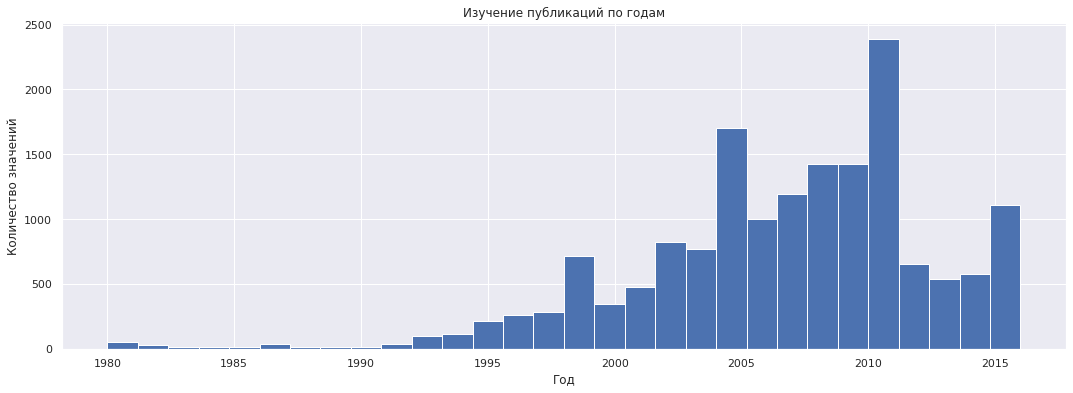

                          total_sales
platform year_of_release             
3DS      2015.0                 27.78
         2016.0                 15.14
PC       2015.0                  8.52
         2016.0                  5.25
PS3      2015.0                 16.82
         2016.0                  3.60
PS4      2015.0                118.90
         2016.0                 69.25
PSP      2015.0                  0.12
PSV      2015.0                  6.25
         2016.0                  4.25
Wii      2015.0                  1.14
         2016.0                  0.18
WiiU     2015.0                 16.35
         2016.0                  4.60
X360     2015.0                 11.96
         2016.0                  1.52
XOne     2015.0                 60.14
         2016.0                 26.15


,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


In [33]:
#изучим данные на последние 2 года
data_2_years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=False)
print(data_2_years.head(2))
data.hist('year_of_release', bins=30, figsize=(18, 6), grid=True)
plt.title('Изучение публикаций по годам')
plt.xlabel('Год')
plt.ylabel('Количество значений')
plt.show()
#sns.scatterplot(x="year_of_release", y="total_sales"\
 #               ,hue="year_of_release"\
  #              ,size="year_of_release"\
   #             ,data=data[data['year_of_release'] >= 2014]\
    #            ,sizes=(20, 30));

actual_data_games_sales = data.query('year_of_release > 2014')

best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
print(best_sales_platform)
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False)

In [34]:
#list = ['PS2','X360','PS3','Wii','DS', 'PSP'] best_sales_platform
top_platforms = data[data['platform'].isin(['PS4','XOne','3DS','WiiU','PS3', 'PC', 'X360'])] 
top_platforms = top_platforms[top_platforms['total_sales']<1.4]
top_platforms = top_platforms[top_platforms['year_of_release']>2014]

top_platforms['total_sales'].describe()
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)
print(top_platforms)

best_sales_platform_2 = pd.pivot_table(top_platforms, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform_2.sort_values('total_sales', ascending=False)

     index                                           name platform  \
0     1387                                Mortal Kombat X     XOne   
1     1389                        Rise of the Tomb Raider     XOne   
2     1425                                 Gears of War 4     XOne   
3     1441                Tom Clancy's Rainbow Six: Siege     XOne   
4     1452                                  Yokai Watch 3      3DS   
..     ...                                            ...      ...   
837  16389                               Prison Architect     XOne   
838  16401  Metal Gear Solid V: The Definitive Experience     XOne   
839  16406               Aikatsu Stars! My Special Appeal      3DS   
840  16420                   Dynasty Warriors: Eiketsuden      PS3   
841  16439                  Samurai Warriors: Sanada Maru      PS3   

     year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
0             2015.0   Fighting      1.03      0.21      0.00         0.14   
1  

,total_sales
platform,
PS4,58.79
XOne,42.46
3DS,23.11
PS3,16.03
PC,13.77
WiiU,11.72
X360,10.21


**Вывод** Взяли данные за соответствующий актуальный период - c 2014 года. 
Не стали учитывать в работе данные за предыдущие годы. По графикам наблюдается спад продаж.

**Задача** Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

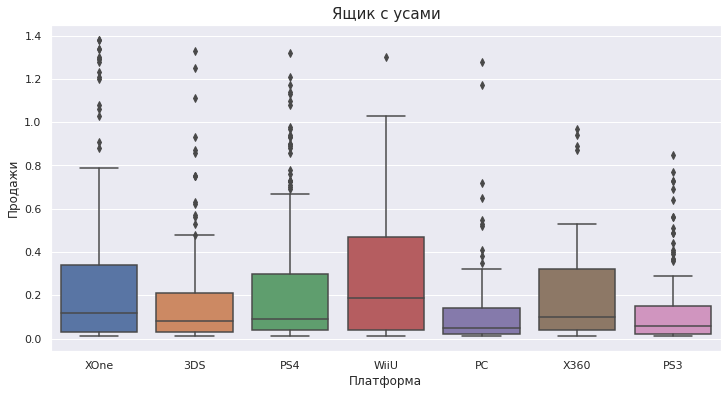

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=top_platforms,  x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

In [36]:
XOne_actual = actual_data_games_sales.query('platform =="XOne"')
XOne_actual['total_sales'].describe()

count    167.000000
mean       0.516707
std        0.965940
min        0.010000
25%        0.035000
50%        0.130000
75%        0.555000
max        7.390000
Name: total_sales, dtype: float64

In [37]:
_3DS_actual = actual_data_games_sales.query('platform =="3DS"')
_3DS_actual['total_sales'].describe()
#

count    132.000000
mean       0.325152
std        0.798620
min        0.010000
25%        0.030000
50%        0.090000
75%        0.232500
max        7.140000
Name: total_sales, dtype: float64

In [38]:
PS4_actual = actual_data_games_sales.query('platform =="PS4"')
PS4_actual['total_sales'].describe()
#

count    301.000000
mean       0.625083
std        1.457063
min        0.010000
25%        0.050000
50%        0.120000
75%        0.420000
max       14.630000
Name: total_sales, dtype: float64

In [39]:
WiiU_actual = actual_data_games_sales.query('platform =="WiiU"')
WiiU_actual['total_sales'].describe()

count    42.00000
mean      0.49881
std       0.85024
min       0.01000
25%       0.05000
50%       0.21500
75%       0.51750
max       4.44000
Name: total_sales, dtype: float64

In [40]:
PC_actual = actual_data_games_sales.query('platform =="PC"')
PC_actual['total_sales'].describe()

count    104.000000
mean       0.132404
std        0.209449
min        0.010000
25%        0.020000
50%        0.050000
75%        0.142500
max        1.280000
Name: total_sales, dtype: float64

In [41]:
X360_actual = actual_data_games_sales.query('platform =="X360"')
X360_actual['total_sales'].describe()

count    48.000000
mean      0.280833
std       0.381207
min       0.010000
25%       0.040000
50%       0.110000
75%       0.352500
max       1.700000
Name: total_sales, dtype: float64

In [42]:
PS3_actual = actual_data_games_sales.query('platform =="PS3"')
PS3_actual['total_sales'].describe()
#

count    111.000000
mean       0.183964
std        0.342696
min        0.010000
25%        0.020000
50%        0.060000
75%        0.160000
max        2.700000
Name: total_sales, dtype: float64

**Вывод** Наиболее востребованные платформы: PS3, XOne, WiiU, PS4, 3DS. 

Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на других платформах. Можно ожидать положительные тенденции в 2017 году.


**Задача**  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Соотнесите выводы с продажами игр на других платформах.

In [43]:
PS4 = data[data['platform']=='PS4']
PS4['user_score'].corr(PS4['total_sales'])


-0.031957110204556376

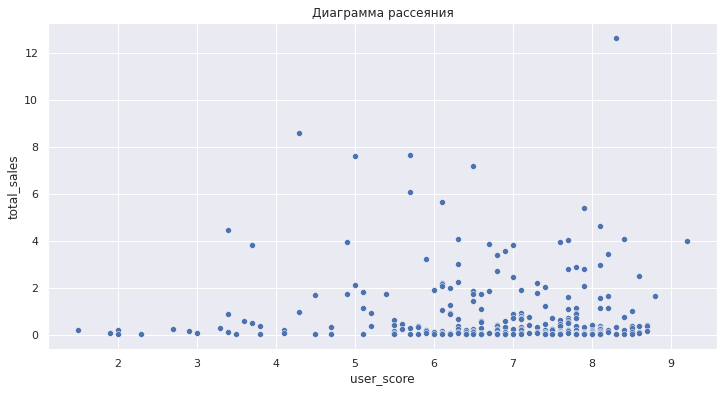

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.title('Диаграмма рассеяния')
plt.show()

In [45]:
PS4['critic_score'].corr(PS4['total_sales'])

0.40656790206178095

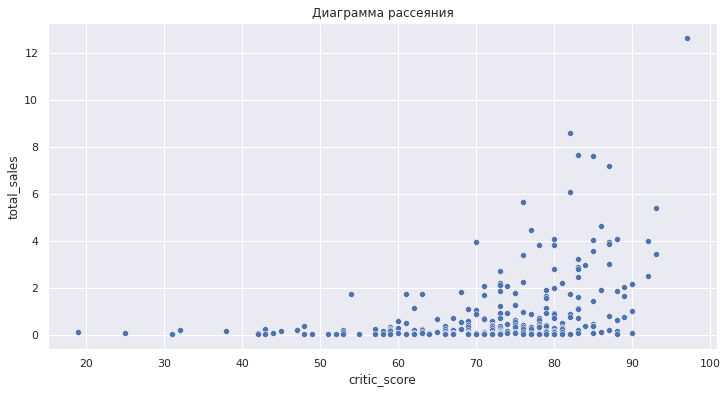

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.title('Диаграмма рассеяния')
plt.show()

In [47]:
PS4_sales_ratings = PS4_actual.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_sales_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.392849,-0.059738
critic_score,0.392849,1.000000,0.533330
user_score,-0.059738,0.533330,1.000000


**Вывод**  Для платформы PS4 есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам 
не носит сильного смысла. Но на мнение игроков влияет рейтинг - чем выше ценит игру критик, тем выше оценит ее игрок.

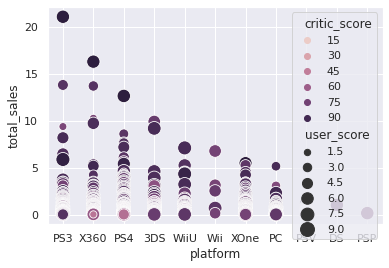

In [48]:
temp_games = (data[(data['year_of_release'] >= 2010)])
#print(temp_games)
data = temp_games[(temp_games['year_of_release'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016]))]

ax = sns.scatterplot(y='total_sales', x='platform', hue='critic_score', size = 'user_score'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2012,2013,2014,2015,2016]))\
                                    &(temp_games['user_score'] > 0)\
                                    &(temp_games['critic_score'] > 0)\
                       ],\
                     sizes=(30,200)\
                )
#plt.show()

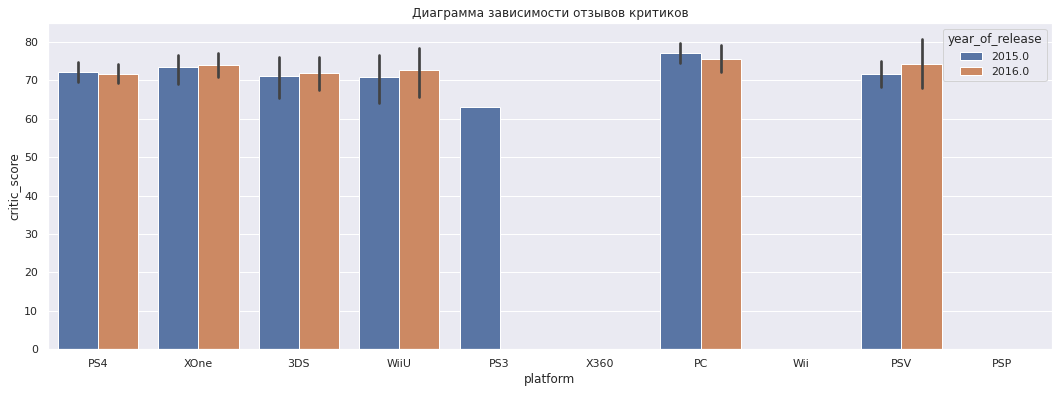

In [49]:
#Изменения за последние три года
temp_games_2 = (data[(data['year_of_release'] > 2014)])
#print(temp_games)
data = temp_games_2[(temp_games_2['year_of_release'].isin([2015, 2016]))]

plt.figure(figsize=(18,6))
ax = sns.barplot(y='critic_score', x='platform',\
                 hue='year_of_release',\
                 data = temp_games_2\
                ).set(title='Диаграмма зависимости отзывов критиков')

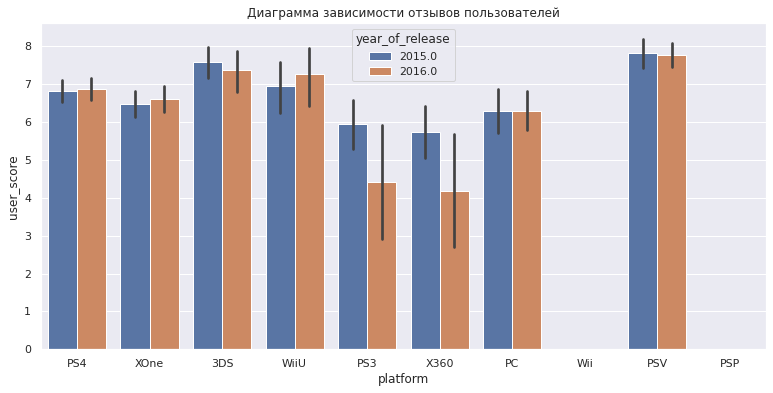

In [50]:
#Изменения за последние два года
plt.figure(figsize=(13,6))
ax = sns.barplot(y='user_score', x='platform',\
                 hue='year_of_release',\
                 data = temp_games_2\
                ).set(title='Диаграмма зависимости отзывов пользователей')

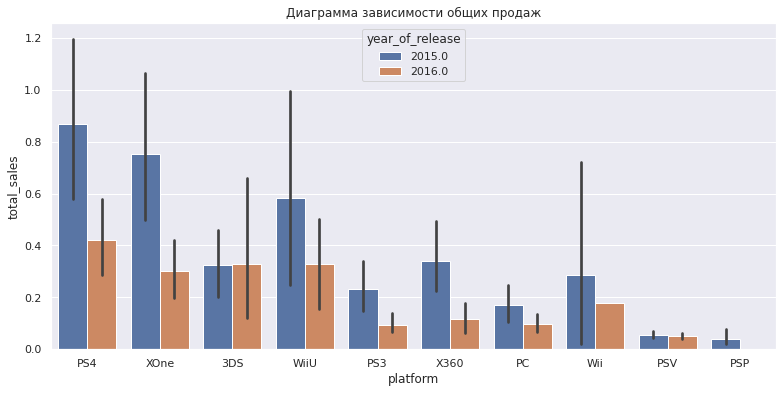

In [51]:
#Изменения за последние два года
plt.figure(figsize=(13,6))
ax = sns.barplot(y='total_sales', x='platform',\
                 hue='year_of_release',\
                 data = temp_games_2\
                ).set(title='Диаграмма зависимости общих продаж')

**Вывод** Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Влияние оценок критиков на продажи PS4 больше, чем пользователей. Для платформы PS4 есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла. Но на мнение игроков влияет рейтинг - чем выше ценит игру критик, тем выше оценит ее игрок.

Общий тренд всех игровых платформ - падение, т.е. ежегодное падение общей выручки, не зависимо от оценок.


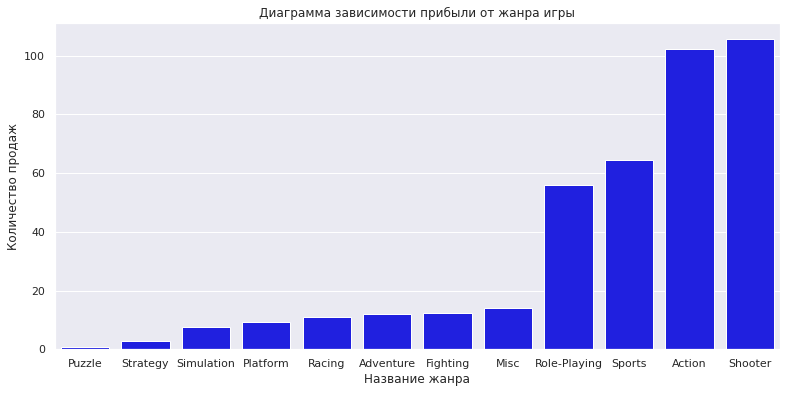

,total_sales
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


In [52]:
data_genre = data.groupby('genre')['total_sales'].sum().sort_values()
#pivot_table
data_genre
plt.figure(figsize=(13,6))
sns.barplot(x=data_genre.index, y=data_genre, color='blue').set(title='Диаграмма зависимости прибыли от жанра игры') 
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")
plt.show()

genre_pivot = pd.pivot_table(actual_data_games_sales, index='genre', values='total_sales', aggfunc='sum')
genre_pivot.sort_values('total_sales', ascending=False)

**Вывод** Многие игры исчезли к 2000м годам и по скольку изменились критерии, которыми характеризуются игры, данные можно опустить и в исследованиях использовать массив за последний актуальный период.

Наиболее востребованные платформы: PS3, XOne, WiiU, PS4, 3DS.  Срок жизни платформы около 7 лет.

Для PS3, PS4 и 3DS видна положительная тенденция к росту продаж. Среднее больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на других платформах. Можно ожидать положительные тенденции в 2017 году.

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Влияние оценок критиков на продажи PS3 больше, чем пользователей.

Общий тренд всех игровых платформ - падение, т.е. ежегодное падение общей выручки, не зависимо от оценок.


Самые продаваемые игры в жанре - action и shooter, самые низкие продажи у puzzle и strategy.

**Шаг 4. Портрет пользователя каждого региона**

**4.1. Самые популярные платформы для NA, EU, JP.**

          na_sales
platform          
PS4          63.86
XOne         50.30
3DS          10.31
WiiU          8.86
X360          8.05
PS3           5.66
PC            3.72
PSV           0.54
Wii           0.49


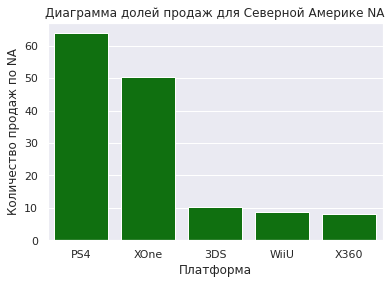

          eu_sales
platform          
PS4          83.54
XOne         28.10
PC            9.10
3DS           7.39
PS3           7.30
WiiU          6.49
X360          4.21
PSV           1.08
Wii           0.73


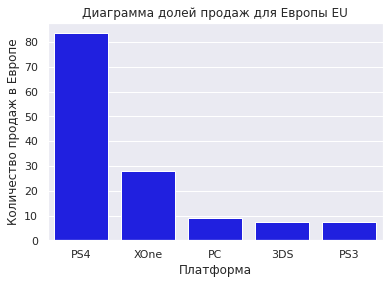

          jp_sales
platform          
3DS          23.55
PS4          12.05
PSV           8.41
PS3           4.97
WiiU          4.12
XOne          0.18
PSP           0.12


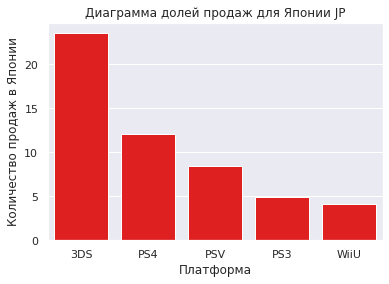

In [53]:

na_actual = actual_data_games_sales.query('na_sales > 0')
na_pivot_table = pd.pivot_table(na_actual, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
print(na_pivot_table)

na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=na.index, y=na, color='green').set(title='Диаграмма долей продаж для Северной Америке NA')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж по NA")
plt.show()

eu_actual = actual_data_games_sales.query('eu_sales > 0')
eu_pivot_table = pd.pivot_table(eu_actual, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
print(eu_pivot_table)

eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=eu.index, y=eu, color='blue').set(title='Диаграмма долей продаж для Европы EU')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж в Европе")
plt.show()

jp_actual = actual_data_games_sales.query('jp_sales > 0')
jp_pivot_table = pd.pivot_table(jp_actual, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
print(jp_pivot_table)

jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=jp.index, y=jp, color='red').set(title='Диаграмма долей продаж для Японии JP')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж в Японии")
plt.show()


**Вывод** Рейтинг платформ:

    Топ 5 по Северной Америке: PS4, XOne, 3DS, WiiU и  X360
    Топ 5 по Европейскому региону: PS4, XOne, PC, 3DS и PS3
    Топ 5 по Японии: 3DS, PS4, PSV, PS3 и WiiU


**4.2. Самые популярные жанры (топ-5)**

              na_sales
genre                 
Shooter          48.18
Action           33.68
Sports           26.31
Role-Playing     19.82
Misc              5.58


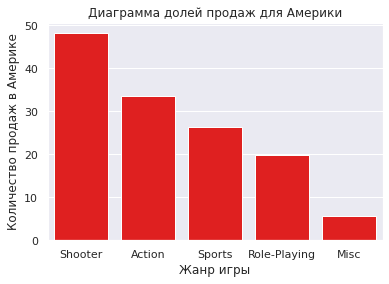

              eu_sales
genre                 
Shooter          40.28
Action           34.82
Sports           27.82
Role-Playing     17.21
Racing            6.52


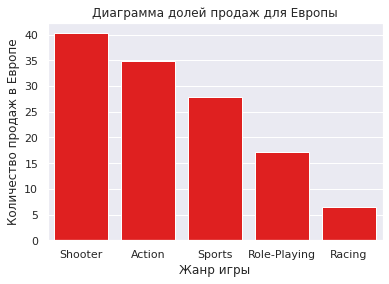

              jp_sales
genre                 
Action           23.05
Role-Playing     13.41
Shooter           3.79
Misc              3.19
Adventure         2.22


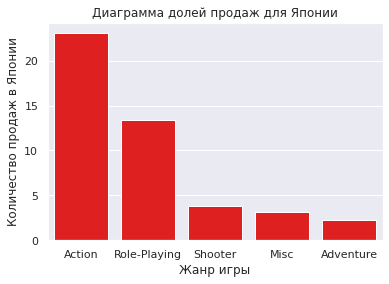

In [68]:
#genre_na = data.pivot_table(
 #   index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
#genre_na = genre_na.reset_index().rename_axis(None, axis=1)
#print(genre_na)
na_actual_genre = actual_data_games_sales.query('na_sales > 0')
na_pivot_table_genre = pd.pivot_table(na_actual_genre, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
na_genre = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(na_pivot_table_genre)
sns.barplot(x=na_genre.index, y=na_genre, color='red').set(title='Диаграмма долей продаж для Америки')
plt.xlabel("Жанр игры")
plt.ylabel("Количество продаж в Америке")
plt.show()

eu_actual_genre = actual_data_games_sales.query('eu_sales > 0')
eu_pivot_table_genre = pd.pivot_table(eu_actual_genre, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
eu_genre = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(eu_pivot_table_genre)
sns.barplot(x=eu_genre.index, y=eu_genre, color='red').set(title='Диаграмма долей продаж для Европы')
plt.xlabel("Жанр игры")
plt.ylabel("Количество продаж в Европе")
plt.show()

jp_actual_genre = actual_data_games_sales.query('jp_sales > 0')
jp_pivot_table_genre = pd.pivot_table(jp_actual_genre, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
jp_genre = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(jp_pivot_table_genre)
sns.barplot(x=jp_genre.index, y=jp_genre, color='red').set(title='Диаграмма долей продаж для Японии')
plt.xlabel("Жанр игры")
plt.ylabel("Количество продаж в Японии")
plt.show()

**Вывод.** Рейтинг жанров:

    Топ 5 по Северной Америке: Shooter, Action, Sports, Role-Playing и Misc
    Топ 5 по Европейскому региону: Shooter, Action, Sports, Role-Playing и Racing
    Топ 5 по Японии: Action, Role-Playing, Shooter, Misc и Adventure   
    Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.


**4.3. Влияние рейтинга ESRB на продажи в регионах.**

rating
miss    32.89
T        7.70
E        5.25
M        4.29
E10+     3.27
Name: jp_sales, dtype: float64


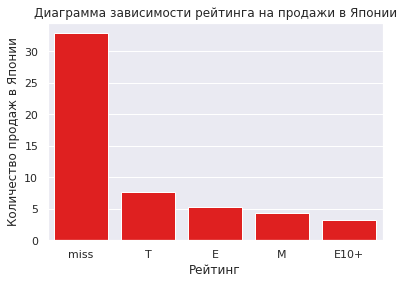


rating
M       45.54
miss    35.71
E       34.83
T       20.32
E10+    11.54
Name: eu_sales, dtype: float64


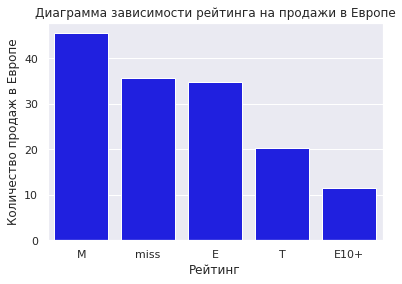


rating
M       47.03
miss    37.44
E       26.59
T       22.86
E10+    17.87
Name: na_sales, dtype: float64


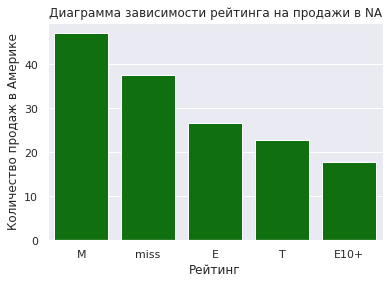

In [69]:


jp_rating = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(jp_rating)
sns.barplot(x=jp_rating.index, y=jp_rating, color='red').set(title='Диаграмма зависимости рейтинга на продажи в Японии') 
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж в Японии")
plt.show()
print()
eu_rating = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(eu_rating)
sns.barplot(x=eu_rating.index, y=eu_rating, color='blue').set(title='Диаграмма зависимости рейтинга на продажи в Европе') 
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж в Европе")
plt.show()
print()
na_rating = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print(na_rating)
sns.barplot(x=na_rating.index, y=na_rating, color='green').set(title='Диаграмма зависимости рейтинга на продажи в NA') 
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж в Америке")
plt.show()


        jp_sales
rating          
miss       32.89
T           7.70
E           5.25
M           4.29
E10+        3.27


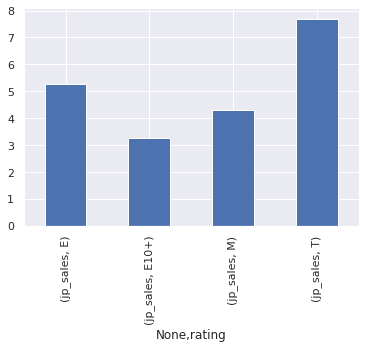

In [70]:

#actual_data_rating = data.query('rating != miss')

actual_data_games_sales = data.query('year_of_release > 2014')
#actual_data_games_sales.info()
jp_actual_data_games_sales = actual_data_games_sales.query('jp_sales > 0')
#jp_actual_data_games_sales.info()
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
print(jp_rating_pivot_table)

(data[(data['rating'].isin(['M', 'E', 'T', 'E10+']))]
 .pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
 .unstack()
 .plot(kind='bar')
);

        eu_sales
rating          
M          45.54
miss       35.71
E          34.83
T          20.32
E10+       11.54


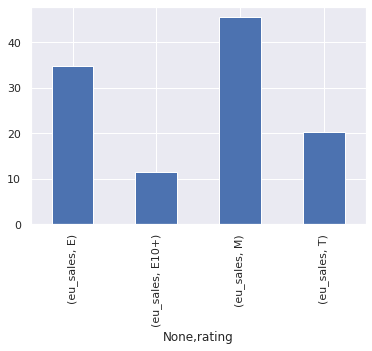

In [71]:
actual_data_games_sales = data.query('year_of_release > 2014')
eu_actual_data_games_sales = actual_data_games_sales.query('eu_sales > 0')
#eu_actual_data_games_sales.info()
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
print(eu_rating_pivot_table)
(data[(data['rating'].isin(['M', 'E', 'T', 'E10+', 'RP']))]
 .pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
 .unstack()
 .plot(kind='bar')
);

        na_sales
rating          
M          47.03
miss       37.44
E          26.59
T          22.86
E10+       17.87


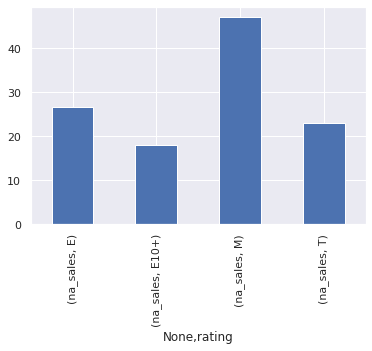

In [72]:
actual_data_games_sales = data.query('year_of_release > 2014')
na_actual_data_games_sales = actual_data_games_sales.query('na_sales > 0')
#na_actual_data_games_sales.info()
na_rating_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
print(na_rating_pivot_table)

(data[(data['rating'].isin(['M', 'E', 'T', 'E10+', 'EC']))]
 .pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
 .unstack()
 .plot(kind='bar')
);

**Вывод** Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+, следующий рейтинг - для всех. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом  13+. Компании хотят распространить свое влияние на молодежь.



**Шаг 5. Проверка гипотез**

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**Гипотезы**

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются


In [74]:
xone = actual_data_games_sales[(actual_data_games_sales['platform']=='XOne')]['user_score'].dropna()
pc = actual_data_games_sales[(actual_data_games_sales['platform']=='PC')]['user_score'].dropna()
xone.mean() #Средний рейтинг для платформ XOne
pc.mean() #Средний рейтинг для платформ PC
xone.describe()
xone.unique()

array([6.4, 6.2, 7.5, 4.4, 5.5, 3.1, 6.1, 8.2, 6.9, 7.9, 6.6, 7.3, 8. ,
       9.2, 7.8, 8.4, 5.9, 5.1, 5.2, 7.4, 5.6, 7. , 7.7, 6.7, 4.6, 5.7,
       6.8, 8.1, 6. , 8.6, 7.2, 8.5, 4.3, 5.8, 5.3, 4. , 8.3, 4.1, 8.7,
       2.1, 7.6, 6.3, 4.9, 7.1, 8.9, 1.6, 4.2, 8.8])

In [ ]:
#actual_data_games_sales


In [76]:
#Проверка гипотезы
alpha = 0.05
results = st.ttest_ind(
    xone.dropna(), 
    pc.dropna(),
    equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


**Вывод** 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

При проверке первой гипотезы, мы получили результат: "Не получилось отвергнуть нулевую гипотезу". Следовательно, у нас есть вероятности получить одинаковые средние рейнтинги по двум платформам.

**5.2. Средние пользовательские рейтинги жанров Action и Sports**

**Гипотезы**

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports разные


In [77]:

action_gen = actual_data_games_sales[(actual_data_games_sales['genre']=='Action')]['user_score'].dropna()
sports_gen = actual_data_games_sales[(actual_data_games_sales['genre']=='Sports')]['user_score'].dropna() 
action_gen.mean()
sports_gen.mean()
sports_gen.describe()
action_gen.unique()

array([8.1, 7.6, 8.2, 6.8, 8.6, 9. , 6.3, 7.9, 6.5, 5.1, 4.5, 6.6, 6.1,
       7.8, 8.4, 8.7, 7. , 6.4, 7.1, 7.4, 7.3, 7.5, 6.7, 7.2, 7.7, 4.6,
       3.7, 5.6, 8. , 5.4, 6.9, 4.2, 5.7, 3.3, 4.3, 5.5, 8.5, 5.9, 3.2,
       8.8, 4.8, 5.3, 2.5, 6. , 5.2, 4.9, 3.4, 5.8, 8.3, 2. , 2.8, 3.1,
       2.3])

In [79]:
#Проверка гипотезы
alpha = 0.05
results = st.ttest_ind(
    action_gen.dropna(), 
    sports_gen.dropna(),
    equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


**Вывод** 5.2. Средние пользовательские рейтинги жанров Action и Sports

Во втором случае, Отвергаем нулевую гипотезу. То есть, нет вероятности получить одинаковые рейтинги двух жанров.

**Общий вывод**

**2. Подготовка и обработка данных**

Были заменены названия столбцов (приведены к нижнему регистру);
    
Обработаны пропуски и посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.
   
Данные из столбцов name и year_of_release были удалены, так как неопределенных значений было менее 5%. Для работы в дальнейшем будут необходимы данные о годах и имени.

Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. В столбце user_score значения tbd были заменены на Nan. В остальных столбцах данные остаются в прежнем виде.

Возможные причины пропусков: 1) не указаны какие-нибудь сведения из-за не хватки информации 2) в самой системе какие-либо не поладки, дала сбой 3) в некоторых средах есть автозаоплнение, оно не сработало


**3. Исследовательский анализ**

Многие игры исчезли к 2000м годам и по скольку изменились критерии, которыми характеризуются игры, данные можно опустить и в исследованиях использовать массив за последний актуальный период.

Наиболее востребованные платформы: PS3, XOne, WiiU, PS4, 3DS. Срок жизни платформы около 7 лет.

Для PS3, PS4 и 3DS видна положительная тенденция к росту продаж. Среднее больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на других платформах. Можно ожидать положительные тенденции в 2017 году.

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Влияние оценок критиков на продажи PS4 больше, чем пользователей. Для платформы PS4 есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла. Но на мнение игроков влияет рейтинг - чем выше ценит игру критик, тем выше оценит ее игрок.

Общий тренд всех игровых платформ - падение, т.е. ежегодное падение общей выручки, не зависимо от оценок.

Самые продаваемые игры в жанре - action и shooter, самые низкие продажи у puzzle и strategy.

**4. Портрет пользователя каждого региона**

Рейтинг платформ по регионам:

Топ 5 по Северной Америке: PS4, XOne, 3DS, WiiU и  X360
Топ 5 по Европейскому региону: PS4, XOne, PC, 3DS и PS3
Топ 5 по Японии: 3DS, PS4, PSV, PS3 и WiiU

Самые популярные жанры Action и Sports, входят в тройку лидеров на всех рынках. В Японии на первом месте RPG игры, а у остальных регионов этот жанр не вошёл даже в пятерку.

Рейтинг возраста влияет по каждому региону.
В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом для всех. Компании хотят распространить свое влияние на все поколения.

**5. Проверка гипотез**

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

При проверке первой гипотезы, мы получили результат: "Не получилось отвергнуть нулевую гипотезу". Следовательно, у нас есть вероятности получить одинаковые средние рейнтинги по двум платформам.


5.2. Средние пользовательские рейтинги жанров Action и Sports

Во втором случае, Отвергаем нулевую гипотезу. То есть, нет вероятности получить одинаковые рейтинги двух жанров.

-Нулевая и альтернативные гипотезы сформулированы согласно поставленной задачи. H₀ всегда формулируется так, чтобы использовать знак равенства. Альтернативная гипотеза H₁ - это утверждение, которое принимается верным, если отбрасывается H₀.
